### Correlation or Linear Regression: cannot detect non-linear bivariate relationships without extensive preprocessing.  
### If there is any relationship between two columns — no matter if the relationship is linear, non-linear, gaussian

### PP Score
* The score always ranges from 0 to 1 and is data-type agnostic.

* A score of 0 means that the column x cannot predict the column y better than a naive baseline model.

* A score of 1 means that the column x can perfectly predict the column y given the model.

* A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.



In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns

In [2]:
path = "../Data/"

### Understanding difference between PPS and Correlation

## Unfused original mean dataset with target

In [3]:
mean = pd.read_csv(path+'final_mean.csv')
mean = mean.drop("Unnamed: 0",axis=1)
mean.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [4]:
len(mean['acc'])

5893

In [4]:
target_label = []
for row in mean["target"]:
        if(row == 0):
            target_label.append("a")
        elif(row == 1):
            target_label.append("b")
        elif(row == 2):
            target_label.append("c")
        elif(row == 3):
            target_label.append("d")
        elif(row == 4):
            target_label.append("e")
            
print(target_label)                

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

In [5]:
data = mean.drop(["target"], axis=1)
data["target_label"] = target_label

In [14]:
pps.predictors(data, "target_label")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,speed,target_label,0.851057,classification,True,weighted F1,0.2032,0.881322,DecisionTreeClassifier()
1,light,target_label,0.688394,classification,True,weighted F1,0.2032,0.751713,DecisionTreeClassifier()
2,sound,target_label,0.582200,classification,True,weighted F1,0.2032,0.667097,DecisionTreeClassifier()
3,linear_acc,target_label,0.458526,classification,True,weighted F1,0.2032,0.568554,DecisionTreeClassifier()
4,gyr,target_label,0.436149,classification,True,weighted F1,0.2032,0.550723,DecisionTreeClassifier()
5,rotation,target_label,0.342149,classification,True,weighted F1,0.2032,0.475824,DecisionTreeClassifier()
6,orient,target_label,0.322717,classification,True,weighted F1,0.2032,0.460341,DecisionTreeClassifier()
7,mag_field,target_label,0.315050,classification,True,weighted F1,0.2032,0.454232,DecisionTreeClassifier()
8,game_rotation,target_label,0.294749,classification,True,weighted F1,0.2032,0.438056,DecisionTreeClassifier()
9,gravity,target_label,0.278910,classification,True,weighted F1,0.2032,0.425435,DecisionTreeClassifier()


In [30]:
pps.matrix(mean, sample=5893)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,acc,acc,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,acc,linear_acc,0.000000,regression,True,mean absolute error,1.107337,1.113758,DecisionTreeRegressor()
2,acc,rotation,0.000000,regression,True,mean absolute error,0.190654,0.231353,DecisionTreeRegressor()
3,acc,game_rotation,0.000000,regression,True,mean absolute error,0.178636,0.204910,DecisionTreeRegressor()
4,acc,sound,0.000000,regression,True,mean absolute error,9.657705,11.630439,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
139,target,light,0.000000,regression,True,mean absolute error,270.646439,301.460490,DecisionTreeRegressor()
140,target,mag_field,0.107543,regression,True,mean absolute error,21.198289,18.918560,DecisionTreeRegressor()
141,target,gyr,0.494146,regression,True,mean absolute error,0.297310,0.150396,DecisionTreeRegressor()
142,target,orient,0.035635,regression,True,mean absolute error,73.888541,71.255495,DecisionTreeRegressor()


<IPython.core.display.Javascript object>


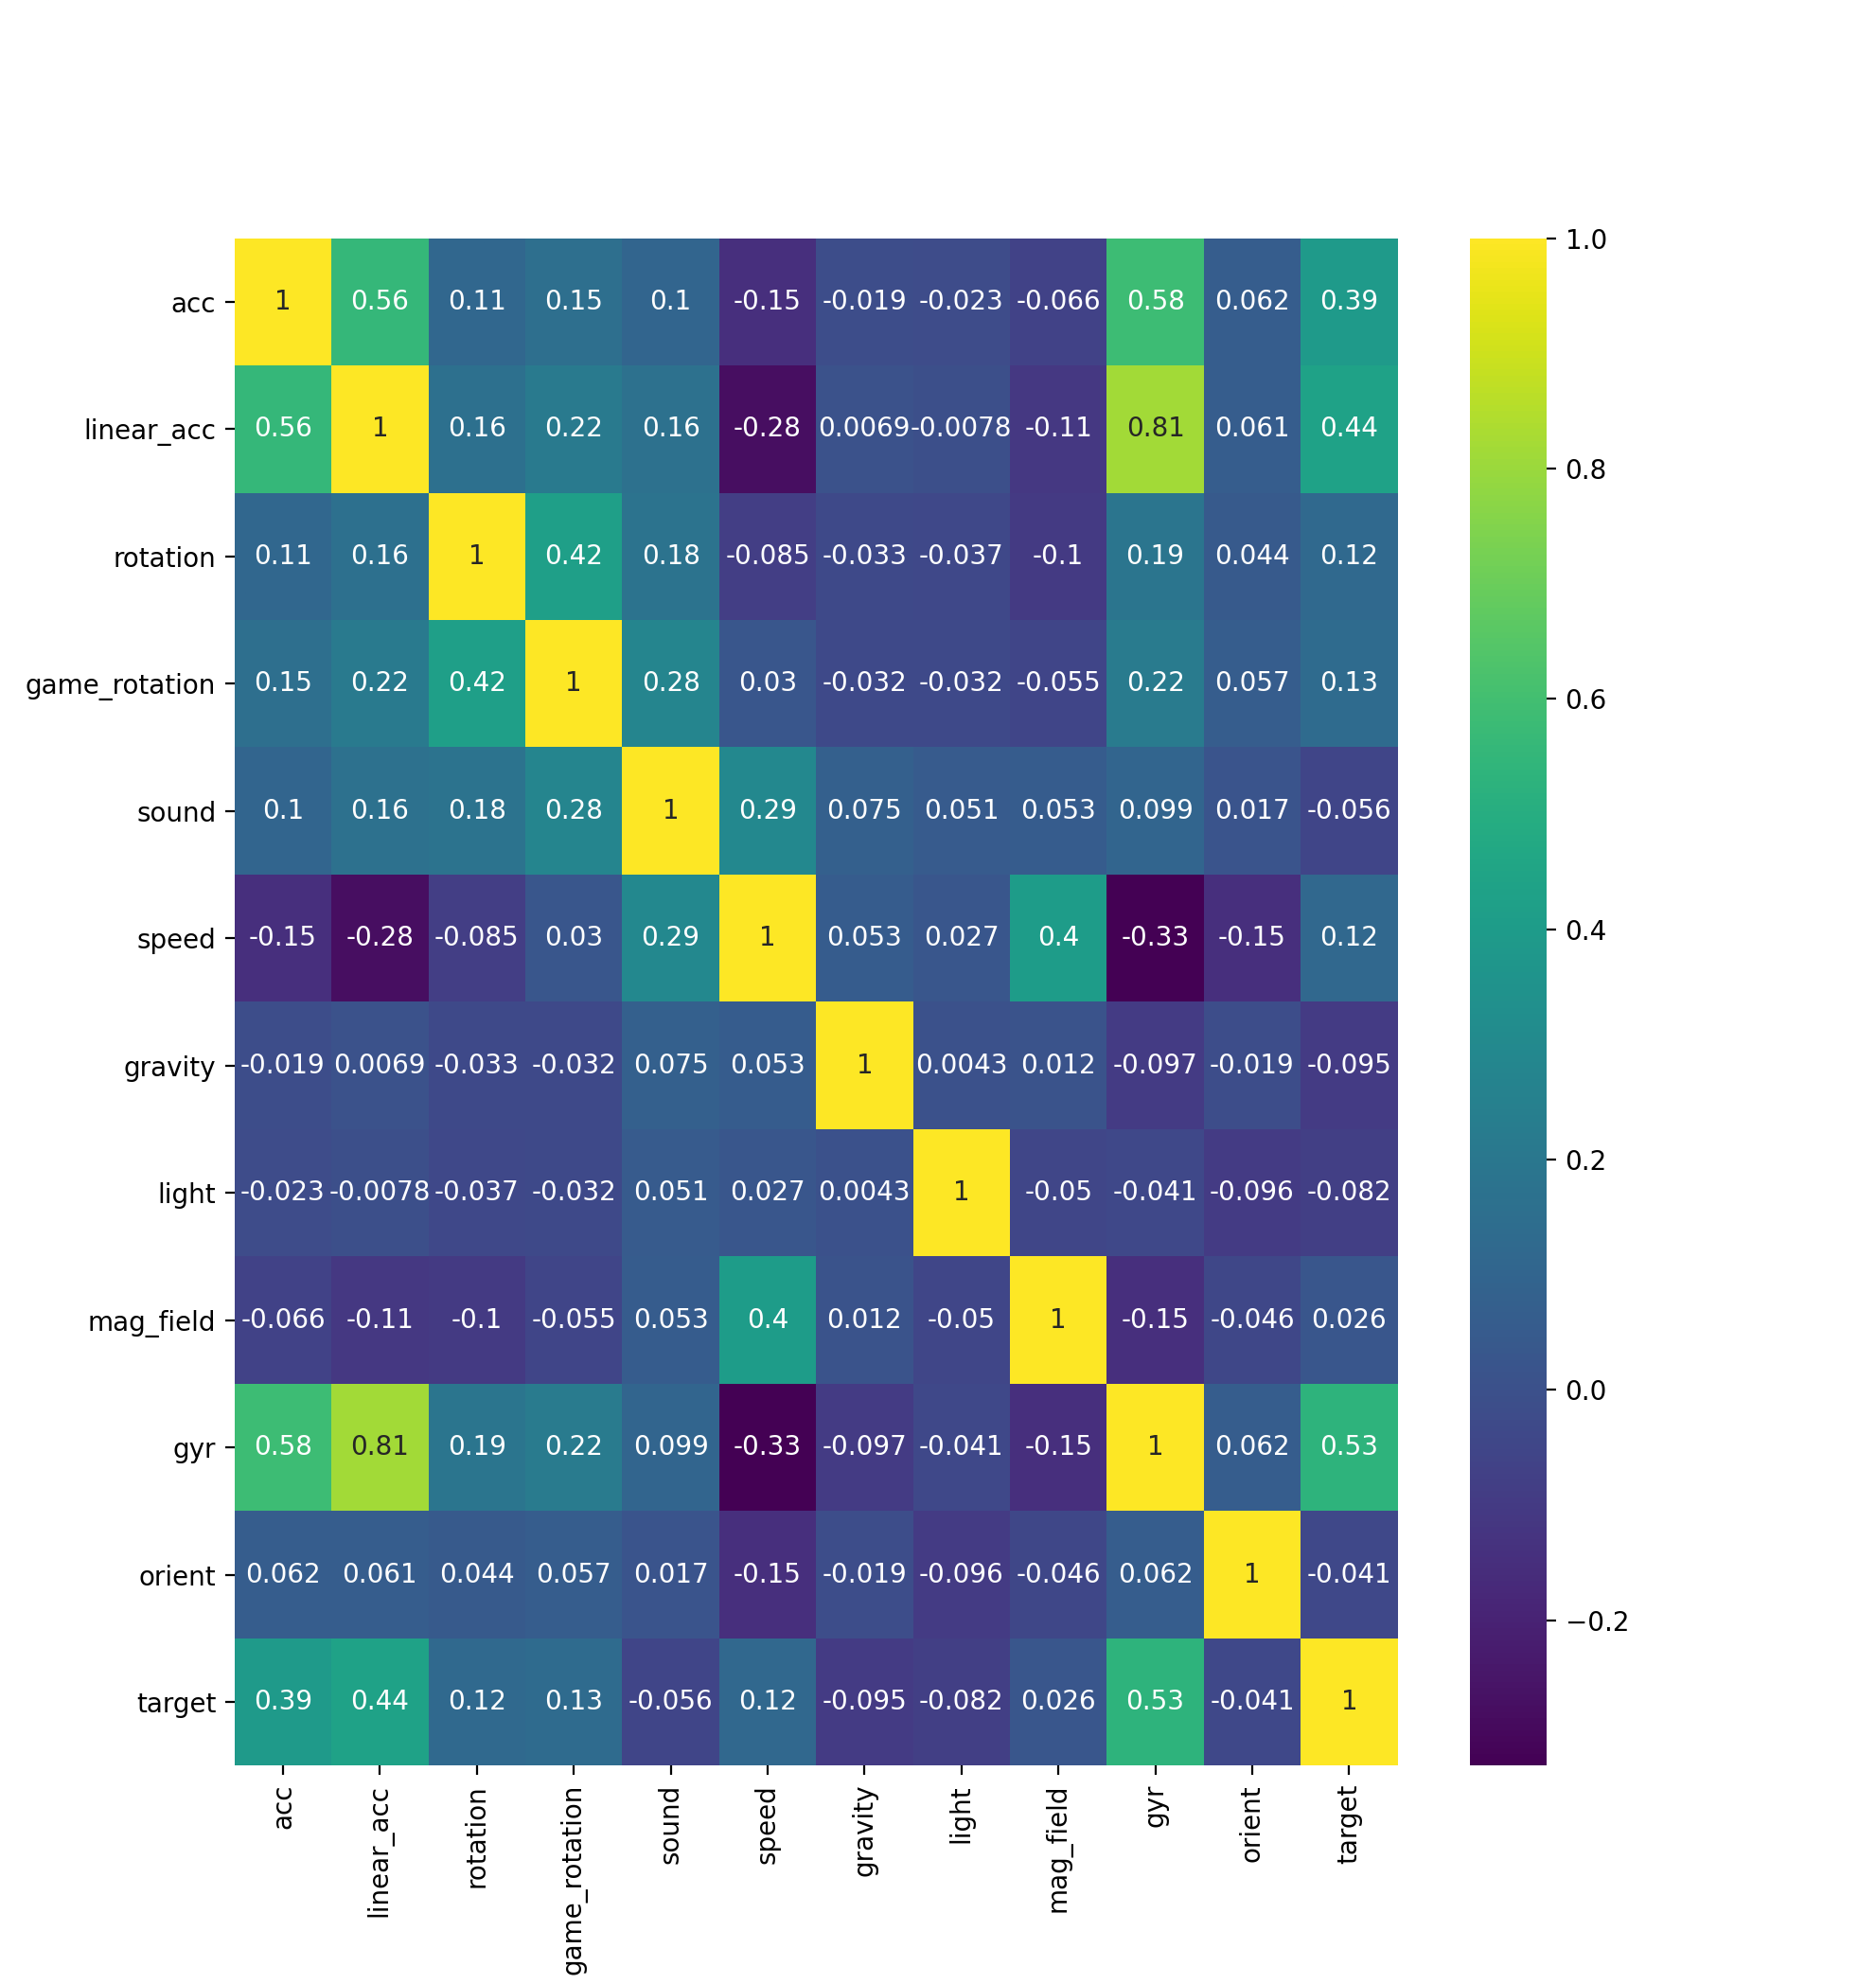

NameError: name 'plt' is not defined

In [7]:
sns.heatmap(mean.corr(),annot=True,cmap='viridis')
plt.title("Mean Feature correlation of TMD")
plt.show()

<IPython.core.display.Javascript object>


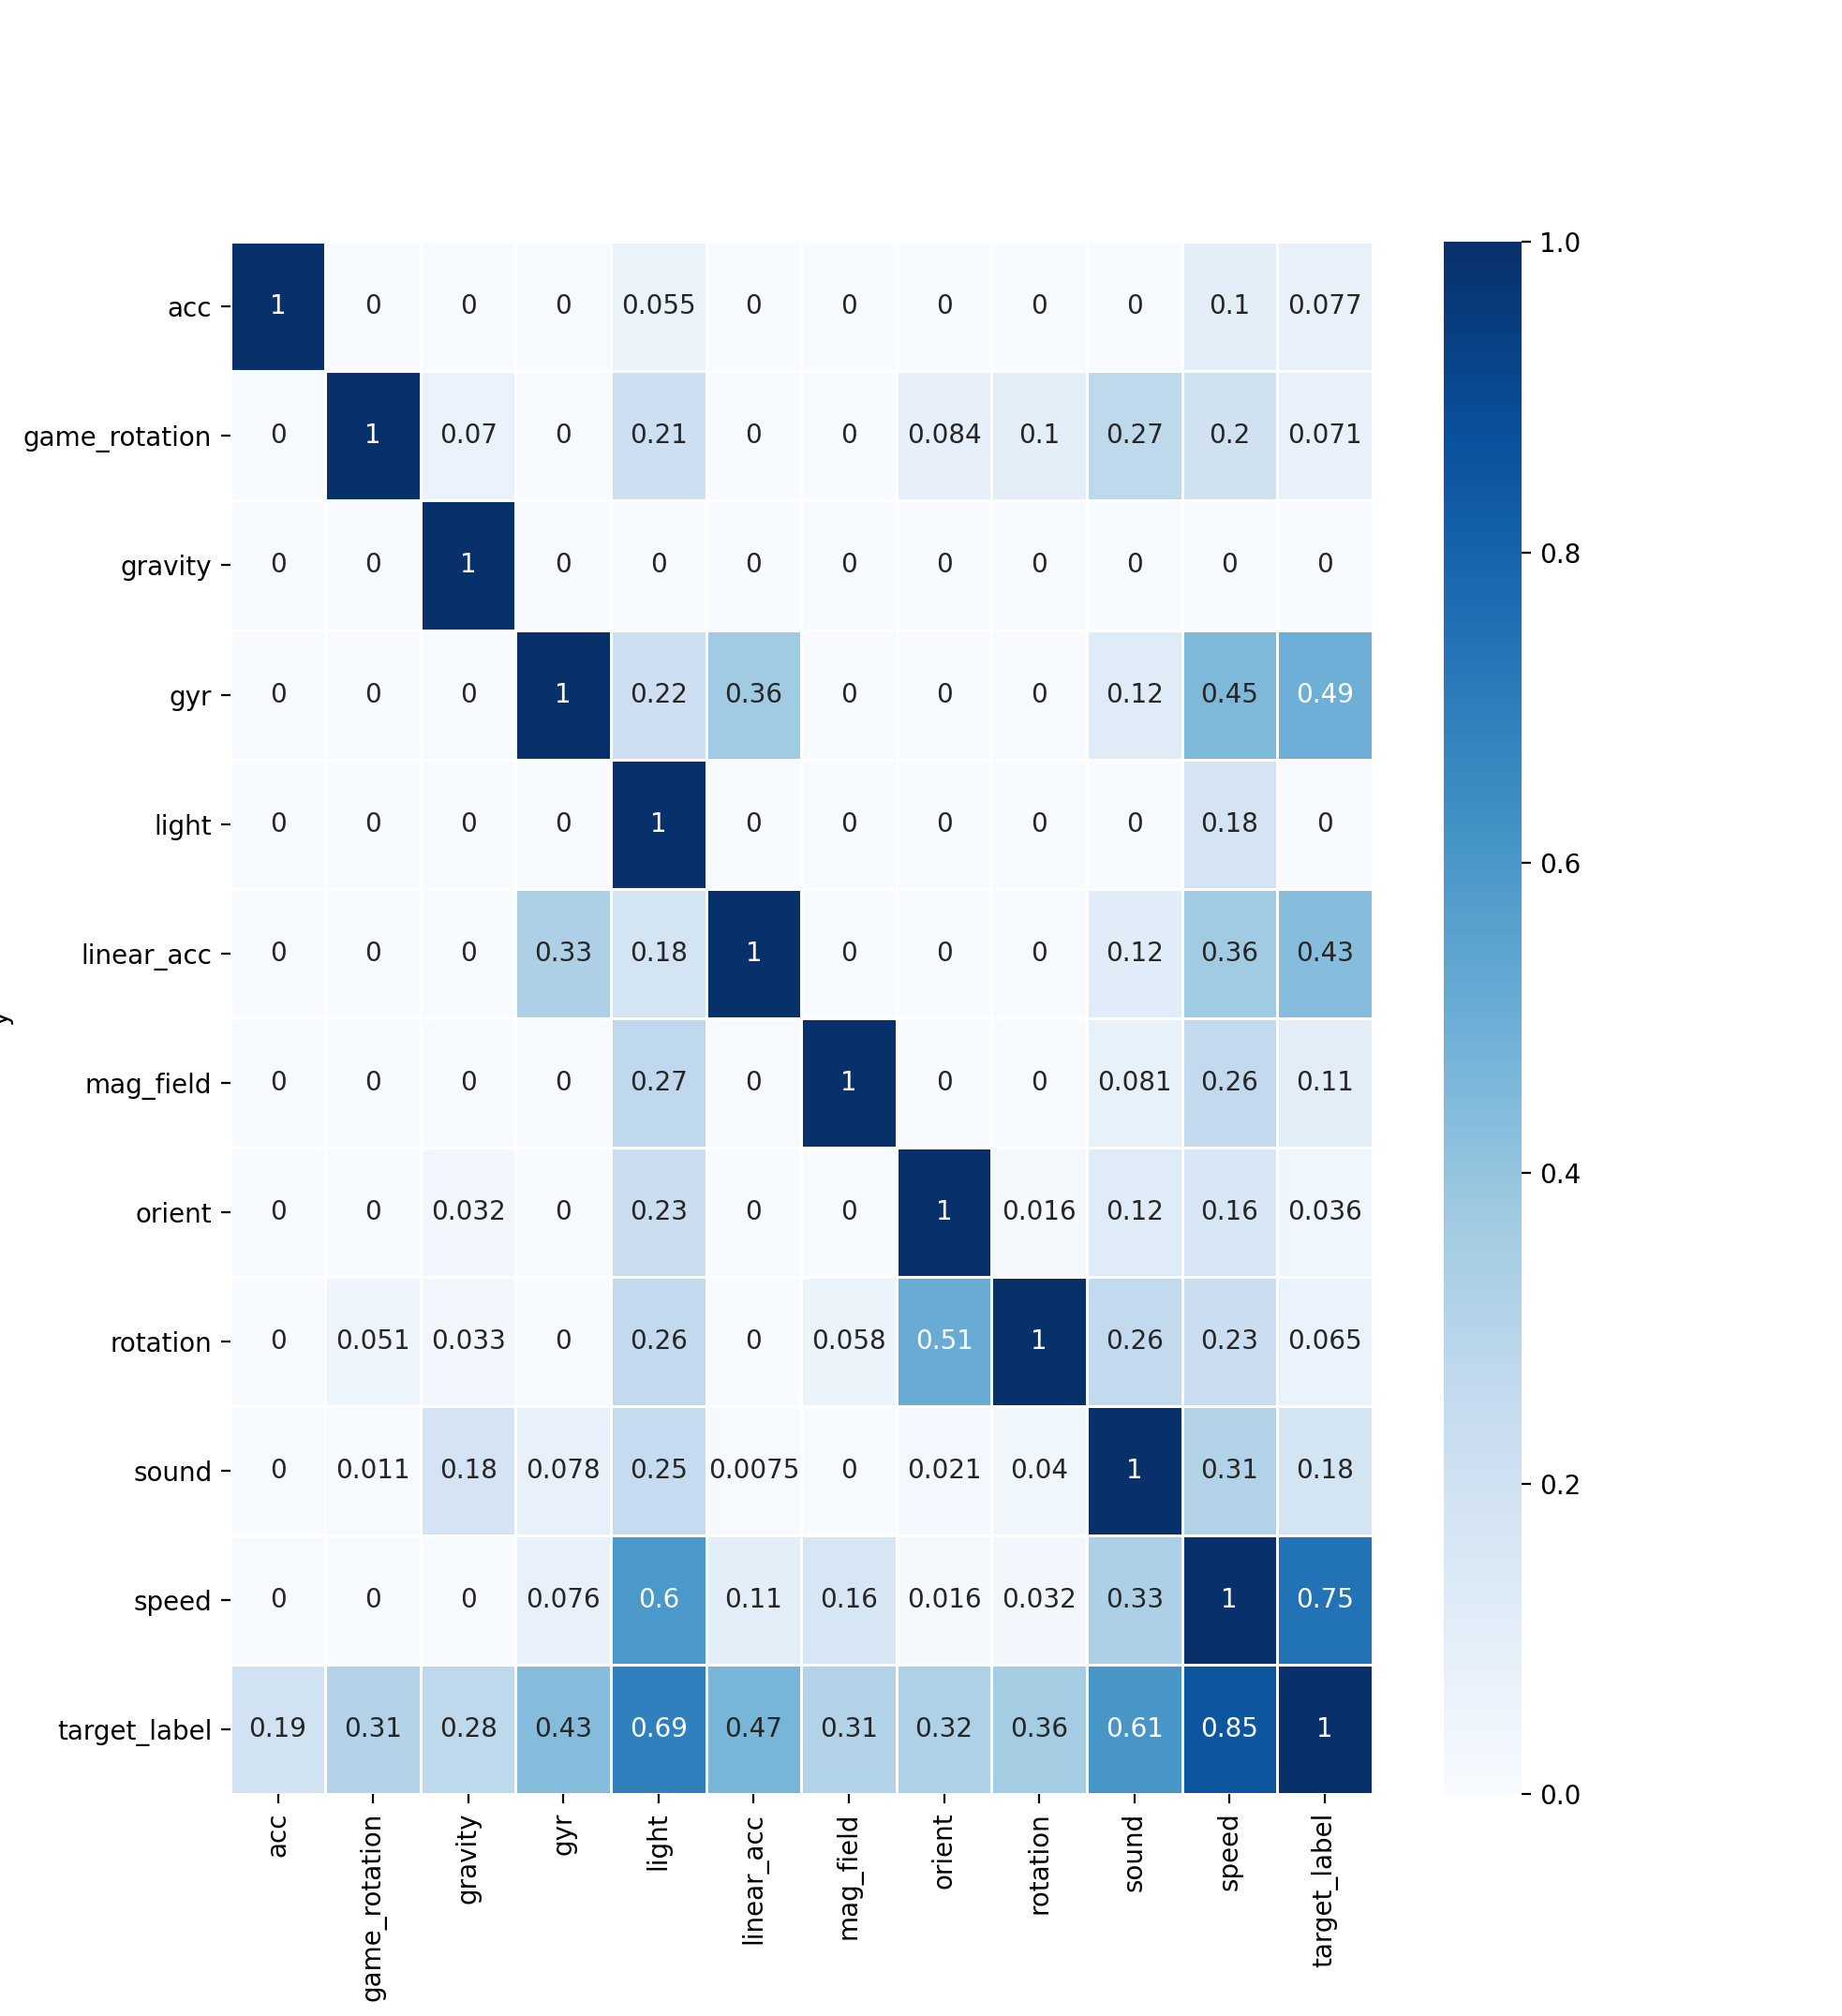

<AxesSubplot:xlabel='x', ylabel='y'>

In [6]:
matrix_df = pps.matrix(data, sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Fused (Accelerometer and Linear Accelerometer)

In [12]:
acc = pd.read_csv(path+'acc_frank.csv')
acc = acc.drop("Unnamed: 0",axis=1)
acc.head()

,fused_acc,target
0,1.320980,0
1,1.327584,0
2,1.299743,0
3,1.290305,0
4,1.289135,0


<IPython.core.display.Javascript object>


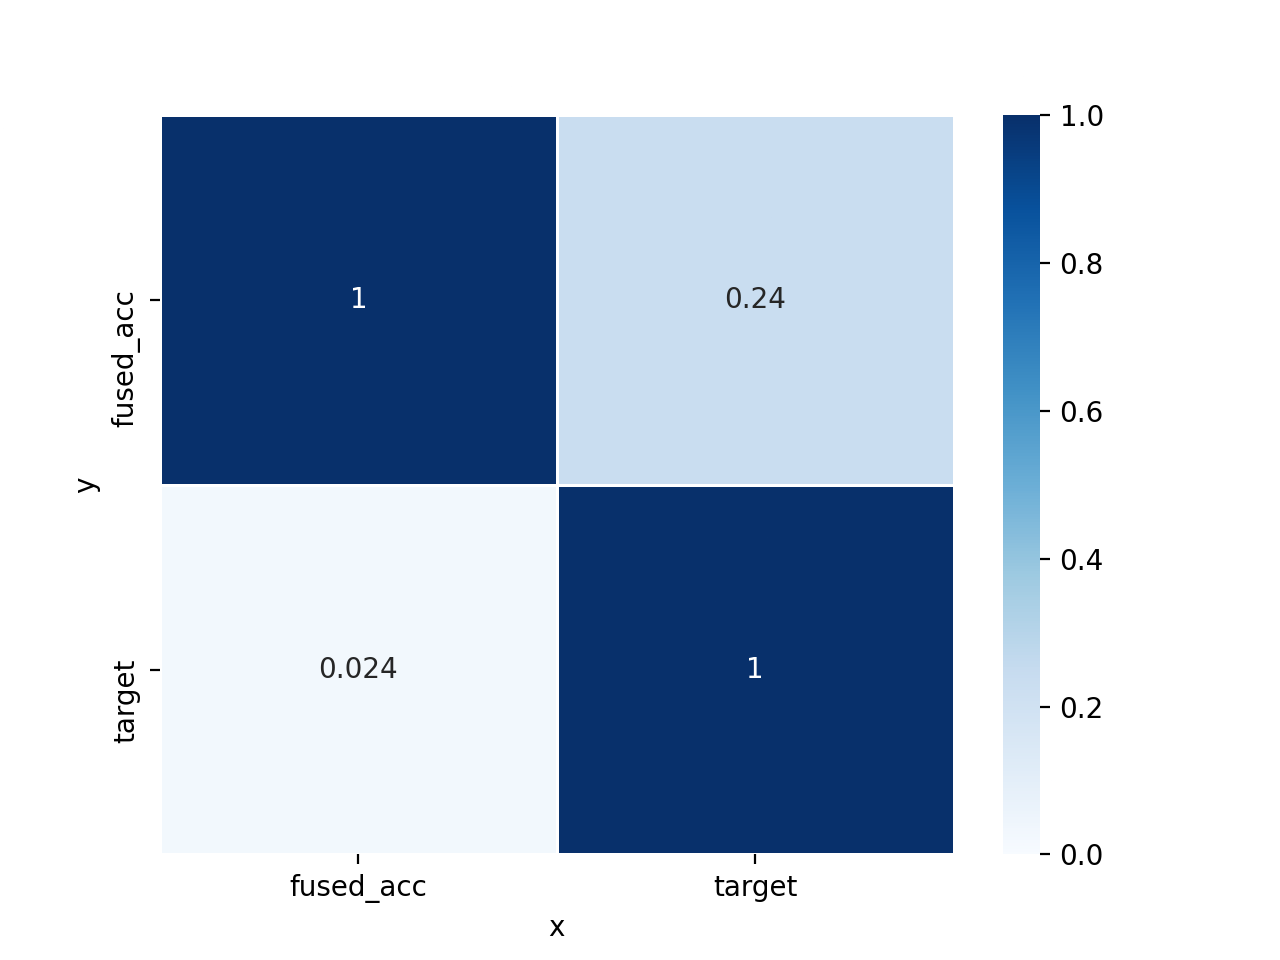

<AxesSubplot:xlabel='x', ylabel='y'>

In [24]:
matrix_acc = pps.matrix(acc,sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_acc, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [14]:
rot = pd.read_csv(path+'rot_frank.csv')
rot = rot.drop("Unnamed: 0",axis=1)
rot.head()

,fused_rot,target
0,1.261941,0
1,0.921476,0
2,1.322760,0
3,1.248091,0
4,1.342031,0


<IPython.core.display.Javascript object>


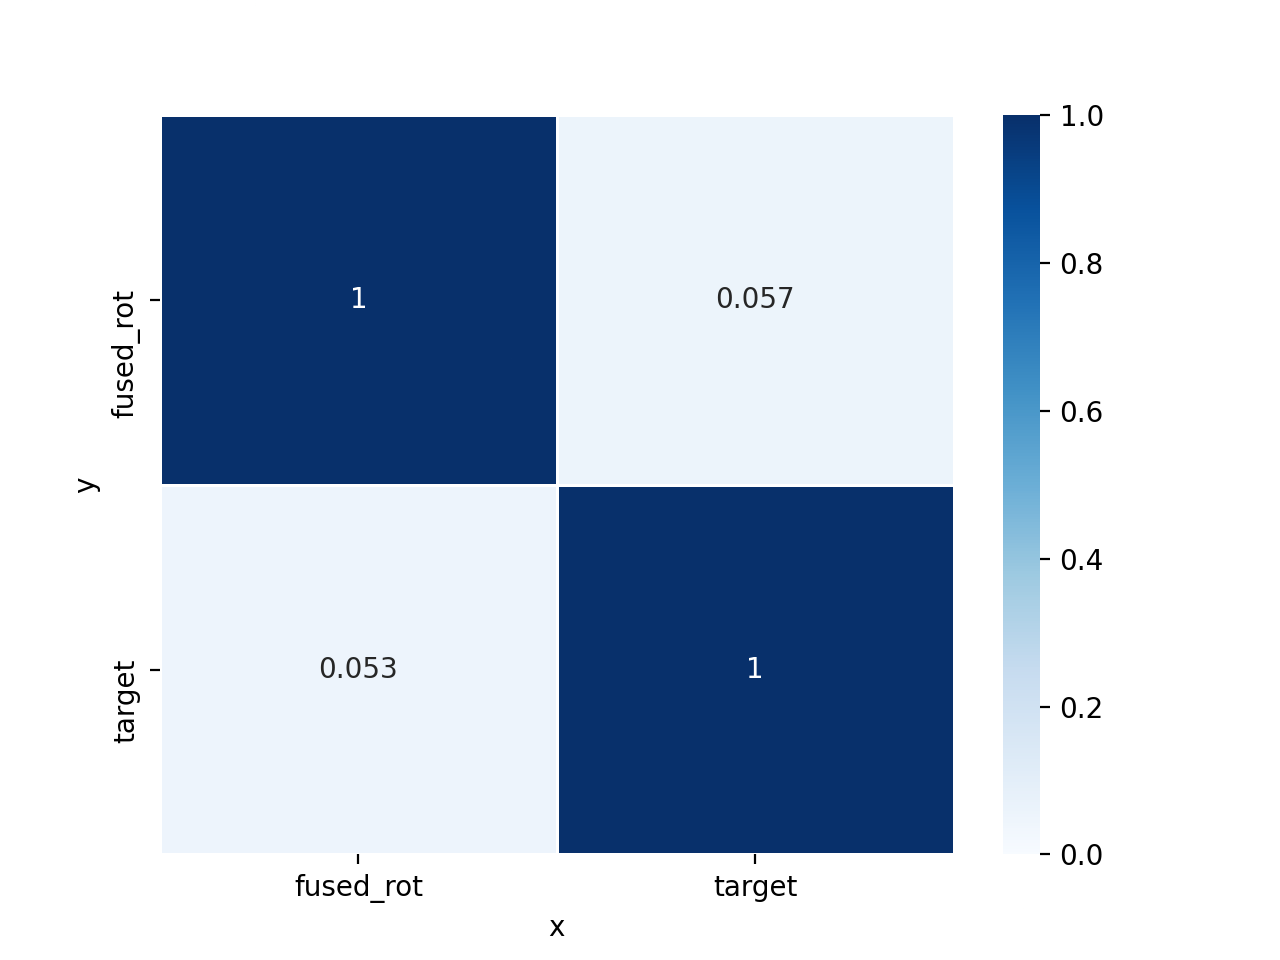

<AxesSubplot:xlabel='x', ylabel='y'>

In [25]:
matrix_rot = pps.matrix(rot, sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_rot, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [17]:
speed_mag = pd.read_csv(path+'speed_mag_clayton.csv')
speed_mag = speed_mag.drop("Unnamed: 0",axis=1)
speed_mag.head()

,fused_speed_mag,target
0,1.247071,0
1,1.682670,0
2,1.460452,0
3,1.878533,0
4,1.753079,0


<IPython.core.display.Javascript object>


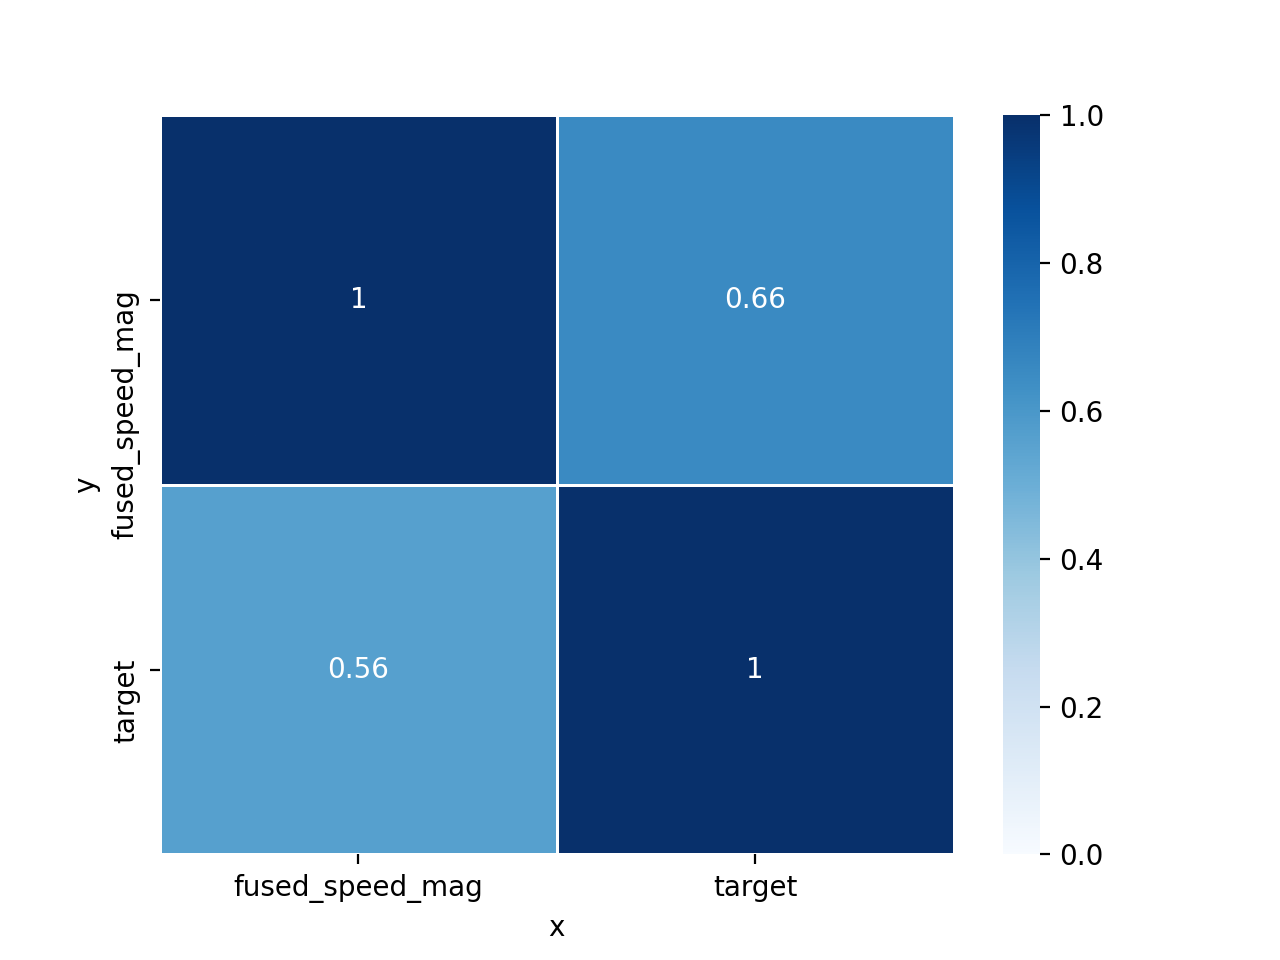

<AxesSubplot:xlabel='x', ylabel='y'>

In [27]:
matrix_sm = pps.matrix(speed_mag,sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_sm, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)